In [1]:
"""生成示例数据
"""
import numpy as np
import pandas as pd


def create_data():
    data_value = np.array(
        [['long', 'thick', 175, 'no', 'man'],
         ['short', 'medium', 168, 'no', 'man'],
         ['short', 'thin', 178, 'yes', 'man'],
         ['short', 'thick', 172, 'no', 'man'],
         ['long', 'medium', 163, 'no', 'man'],
         ['short', 'thick', 180, 'no', 'man'],
         ['long', 'thick', 173, 'yes', 'man'],
         ['short', 'thin', 174, 'no', 'man'],
         ['long', 'thin', 164, 'yes', 'woman'],
         ['long', 'medium', 158, 'yes', 'woman'],
         ['long', 'thick', 161, 'yes', 'woman'],
         ['short', 'thin', 166, 'yes', 'woman'],
         ['long', 'thin', 158, 'no', 'woman'],
         ['short', 'medium', 163, 'no', 'woman'],
         ['long', 'thick', 161, 'yes', 'woman'],
         ['long', 'thin', 164, 'no', 'woman'],
         ['short', 'medium', 172, 'yes', 'woman']])
    columns = np.array(['hair', 'voice', 'height', 'ear_stud', 'labels'])
    data = pd.DataFrame(data_value.reshape(17, 5), columns=columns)
    return data

In [2]:
data = create_data()
data

,hair,voice,height,ear_stud,labels
0,long,thick,175,no,man
1,short,medium,168,no,man
2,short,thin,178,yes,man
3,short,thick,172,no,man
4,long,medium,163,no,man
5,short,thick,180,no,man
6,long,thick,173,yes,man
7,short,thin,174,no,man
8,long,thin,164,yes,woman
9,long,medium,158,yes,woman


In [3]:
"""计算信息熵
"""
import math


def get_Ent(data):
    """
    参数:
    data -- 数据集

    返回:
    Ent -- 信息熵
    """
    num_sample = len(data)  # 样本个数
    label_counts = {}  # 初始化标签统计字典
    for i in range(num_sample):
        each_data = data.iloc[i, :]
        current_label = each_data["labels"]  # 得到当前元素的标签（label）

        # 如果标签不在当前字典中，添加该类标签并初始化 value=0,否则该类标签 value+1
        if current_label not in label_counts.keys():
            label_counts[current_label] = 0
        label_counts[current_label] += 1

    Ent = 0.0  # 初始化信息熵
    for key in label_counts:
        prob = float(label_counts[key])/num_sample
        Ent -= prob * math.log(prob, 2)  # 应用信息熵公式计算信息熵
    return Ent

In [4]:
base_ent = get_Ent(data)
base_ent

0.9975025463691153

In [5]:
"""计算信息增益
"""


def get_gain(data, base_ent, feature):
    """
    参数:
    data -- 数据集
    base_ent -- 根节点的信息熵
    feature -- 计算信息增益的特征

    返回:
    Ent -- 信息熵
    """

    feature_list = data[feature]  # 得到一个特征的全部取值
    unique_value = set(feature_list)  # 特征取值的类别
    feature_ent = 0.0

    for each_feature in unique_value:
        temp_data = data[data[feature] == each_feature]
        weight = len(temp_data)/len(feature_list)  # 计算该特征的权重值
        temp_ent = weight*get_Ent(temp_data)
        feature_ent = feature_ent+temp_ent

    gain = base_ent - feature_ent  # 信息增益
    return gain

In [6]:
get_gain(data,base_ent,'hair')

0.062200515199107964

In [7]:
"""计算连续值的划分点
"""


def get_splitpoint(data, base_ent, feature):
    """
    参数:
    data -- 数据集
    base_ent -- 根节点的信息熵
    feature -- 需要划分的连续特征

    返回:
    final_t -- 连续值最优划分点
    """
    # 将连续值进行排序并转化为浮点类型
    continues_value = data[feature].sort_values().astype(np.float64)
    continues_value = [i for i in continues_value]  # 不保留原来的索引
    t_set = []
    t_ent = {}

    # 得到划分点 t 的集合
    for i in range(len(continues_value)-1):
        temp_t = (continues_value[i]+continues_value[i+1])/2
        t_set.append(temp_t)

    # 计算最优划分点
    for each_t in t_set:
        # 将大于划分点的分为一类
        temp1_data = data[data[feature].astype(np.float64) > each_t]
        # 将小于划分点的分为一类
        temp2_data = data[data[feature].astype(np.float64) < each_t]
        weight1 = len(temp1_data)/len(data)
        weight2 = len(temp2_data)/len(data)
        # 计算每个划分点的信息增益
        temp_ent = base_ent-weight1 * \
            get_Ent(temp1_data)-weight2*get_Ent(temp2_data)
        t_ent[each_t] = temp_ent
    print("t_ent:", t_ent)
    final_t = max(t_ent, key=t_ent.get)
    return final_t

In [8]:
final_t = get_splitpoint(data, base_ent, 'height')
final_t

t_ent: {158.0: 0.1179805181500242, 159.5: 0.1179805181500242, 161.0: 0.2624392604045631, 162.0: 0.2624392604045631, 163.0: 0.3856047022157598, 163.5: 0.15618502398692893, 164.0: 0.3635040117533678, 165.0: 0.33712865788827096, 167.0: 0.4752766311586692, 170.0: 0.32920899348970845, 172.0: 0.5728389611412551, 172.5: 0.4248356349861979, 173.5: 0.3165383509071513, 174.5: 0.22314940393447813, 176.5: 0.14078143361499595, 179.0: 0.06696192680347068}


172.0

In [9]:
def choice_1(x, t):
    if x > t:
        return ">{}".format(t)
    else:
        return "<{}".format(t)


deal_data = data.copy()
# 使用lambda和map函数将 height 按照final_t划分为两个类别
deal_data["height"] = pd.Series(
    map(lambda x: choice_1(int(x), final_t), deal_data["height"]))
deal_data

,hair,voice,height,ear_stud,labels
0,long,thick,>172.0,no,man
1,short,medium,<172.0,no,man
2,short,thin,>172.0,yes,man
3,short,thick,<172.0,no,man
4,long,medium,<172.0,no,man
5,short,thick,>172.0,no,man
6,long,thick,>172.0,yes,man
7,short,thin,>172.0,no,man
8,long,thin,<172.0,yes,woman
9,long,medium,<172.0,yes,woman


In [10]:
"""选择最优划分特征
"""


def choose_feature(data):
    """
    参数:
    data -- 数据集

    返回:
    best_feature -- 最优的划分特征
    """
    num_features = len(data.columns) - 1  # 特征数量
    base_ent = get_Ent(data)
    best_gain = 0.0  # 初始化信息增益
    best_feature = data.columns[0]
    for i in range(num_features):  # 遍历所有特征
        temp_gain = get_gain(data, base_ent, data.columns[i])    # 计算信息增益
        if (temp_gain > best_gain):  # 选择最大的信息增益
            best_gain = temp_gain
            best_feature = data.columns[i]
    return best_feature  # 返回最优特征

In [11]:
choose_feature(deal_data)

'height'

In [12]:
"""构建决策树
"""


def create_tree(data):
    """
    参数:
    data -- 数据集

    返回:
    tree -- 以字典的形式返回决策树
    """
    feature_list = data.columns[:-1].tolist()
    label_list = data.iloc[:, -1]
    if len(data["labels"].value_counts()) == 1:
        leaf_node = data["labels"].mode().values
        return leaf_node            # 第一个递归结束条件：所有的类标签完全相同
    if len(feature_list) == 1:
        leaf_node = data["labels"].mode().values
        return leaf_node   # 第二个递归结束条件：用完了所有特征
    best_feature = choose_feature(data)   # 最优划分特征
    tree = {best_feature: {}}
    feat_values = data[best_feature]
    unique_value = set(feat_values)
    for value in unique_value:
        temp_data = data[data[best_feature] == value]
        temp_data = temp_data.drop([best_feature], axis=1)
        tree[best_feature][value] = create_tree(temp_data)
    return tree

In [13]:
tree = create_tree(deal_data)
tree

{'height': {'<172.0': {'ear_stud': {'no': {'voice': {'medium': array(['man'], dtype=object),
      'thick': array(['man'], dtype=object),
      'thin': array(['woman'], dtype=object)}},
    'yes': array(['woman'], dtype=object)}},
  '>172.0': array(['man'], dtype=object)}}

In [14]:
"""决策分类
"""


def classify(tree, test):
    """
    参数:
    data -- 数据集
    test -- 需要测试的数据

    返回:
    class_label -- 分类结果
    """
    first_feature = list(tree.keys())[0]  # 获取根节点
    feature_dict = tree[first_feature]  # 根节点下的树
    labels = test.columns.tolist()
    value = test[first_feature][0]
    for key in feature_dict.keys():
        if value == key:
            if type(feature_dict[key]).__name__ == 'dict':  # 判断该节点是否为叶节点
                class_label = classify(feature_dict[key], test)  # 采用递归直到遍历到叶节点
            else:
                class_label = feature_dict[key]
    return class_label

In [15]:
test = pd.DataFrame({"hair": ["long"], "voice": ["thin"], "height": [163], "ear_stud": ["yes"]})
test

,ear_stud,hair,height,voice
0,yes,long,163,thin


In [16]:
test["height"] = pd.Series(map(lambda x: choice_1(int(x), final_t), test["height"]))
test

,ear_stud,hair,height,voice
0,yes,long,<172.0,thin


In [17]:
!wget http://labfile.oss.aliyuncs.com/courses/1081/course-13-student.csv

--2018-09-26 21:04:19--  http://labfile.oss.aliyuncs.com/courses/1081/course-13-student.csv
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 118.178.161.16
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|118.178.161.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32532 (32K) [text/csv]
Saving to: 'course-13-student.csv.5'

     0K .......... .......... .......... .                    100% 46.9K=0.7s

2018-09-26 21:04:21 (46.9 KB/s) - 'course-13-student.csv.5' saved [32532/32532]



In [18]:
"""导入数据集并预览
"""
import pandas as pd

stu_grade = pd.read_csv('course-13-student.csv')
stu_grade.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,traveltime,studytime,schoolsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,U,A,4.0,course,mother,2,2,yes,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,U,T,1.0,course,father,1,2,no,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,U,T,1.0,other,mother,1,2,yes,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,U,T,3.0,home,mother,1,3,no,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,U,T,3.0,home,father,1,2,no,...,4,3,2,1,2,5,4,6,10,10


In [19]:
new_data = stu_grade.iloc[:, [0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 14, 15, 24, 25, 26]]
new_data.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,4.0,course,mother,2,yes,no,no,yes,no,5,6,6
1,GP,F,U,T,1.0,course,father,2,no,yes,no,yes,yes,5,5,6
2,GP,F,U,T,1.0,other,mother,2,yes,no,yes,yes,yes,7,8,10
3,GP,F,U,T,3.0,home,mother,3,no,yes,yes,yes,yes,15,14,15
4,GP,F,U,T,3.0,home,father,2,no,yes,yes,yes,no,6,10,10


In [20]:
def choice_2(x):
    x = int(x)
    if x < 5:
        return "bad"
    elif x >= 5 and x < 10:
        return "medium"
    elif x >= 10 and x < 15:
        return "good"
    else:
        return "excellent"


stu_data = new_data.copy()
stu_data["G1"] = pd.Series(map(lambda x: choice_2(x), stu_data["G1"]))
stu_data["G2"] = pd.Series(map(lambda x: choice_2(x), stu_data["G2"]))
stu_data["G3"] = pd.Series(map(lambda x: choice_2(x), stu_data["G3"]))
stu_data.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,4.0,course,mother,2,yes,no,no,yes,no,medium,medium,medium
1,GP,F,U,T,1.0,course,father,2,no,yes,no,yes,yes,medium,medium,medium
2,GP,F,U,T,1.0,other,mother,2,yes,no,yes,yes,yes,medium,medium,good
3,GP,F,U,T,3.0,home,mother,3,no,yes,yes,yes,yes,excellent,good,excellent
4,GP,F,U,T,3.0,home,father,2,no,yes,yes,yes,no,medium,good,good


In [21]:
def choice_3(x):
    x = int(x)
    if x > 3:
        return "high"
    elif x > 1.5:
        return "medium"
    else:
        return "low"


stu_data["Pedu"] = pd.Series(map(lambda x: choice_3(x), stu_data["Pedu"]))
stu_data.head()

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,GP,F,U,A,high,course,mother,2,yes,no,no,yes,no,medium,medium,medium
1,GP,F,U,T,low,course,father,2,no,yes,no,yes,yes,medium,medium,medium
2,GP,F,U,T,low,other,mother,2,yes,no,yes,yes,yes,medium,medium,good
3,GP,F,U,T,medium,home,mother,3,no,yes,yes,yes,yes,excellent,good,excellent
4,GP,F,U,T,medium,home,father,2,no,yes,yes,yes,no,medium,good,good


In [22]:
"""特征值替换
"""

def replace_feature(data):
    """
    参数:
    data -- 数据集

    返回:
    data -- 将特征值替换后的数据集
    """
    for each in data.columns:  # 遍历每一个特征名称
        feature_list = data[each]
        unique_value = set(feature_list)
        i = 0
        for fea_value in unique_value:
            data[each] = data[each].replace(fea_value, i)
            i += 1
    return data

In [23]:
stu_data = replace_feature(stu_data)
stu_data.head(10)

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2,G3
0,0,0,1,0,0,1,2,1,1,0,0,1,0,0,0,0
1,0,0,1,1,2,1,1,1,0,1,0,1,1,0,0,0
2,0,0,1,1,2,2,2,1,1,0,1,1,1,0,0,1
3,0,0,1,1,1,3,2,2,0,1,1,1,1,1,1,2
4,0,0,1,1,1,3,1,1,0,1,1,1,0,0,1,1
5,0,1,1,1,1,0,2,1,0,1,1,1,1,1,2,2
6,0,1,1,1,1,3,2,1,0,0,0,1,1,3,1,1
7,0,0,1,0,0,3,2,1,1,1,0,1,0,0,0,0
8,0,1,1,0,1,3,2,1,0,1,1,1,1,1,2,2
9,0,1,1,1,1,3,2,1,0,1,1,1,1,3,2,2


In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(stu_data.iloc[:, :-1], stu_data["G3"], 
                                                    test_size=0.3, random_state=5)

x_test

,school,sex,address,Pstatus,Pedu,reason,guardian,studytime,schoolsup,famsup,paid,higher,internet,G1,G2
306,0,1,1,0,1,1,0,0,0,0,0,1,0,1,2
343,0,0,1,0,1,3,1,1,0,1,0,1,1,0,0
117,0,1,1,1,1,3,1,0,0,0,0,1,1,3,1
50,0,0,1,1,1,1,2,1,0,1,1,1,1,3,1
316,0,0,1,1,2,1,2,1,0,1,1,1,1,0,0
279,0,1,1,1,1,1,2,0,0,0,1,1,1,3,1
394,1,1,1,1,2,1,1,0,0,0,0,1,1,0,0
354,1,1,0,1,1,3,2,1,0,1,1,1,1,3,1
123,0,1,1,1,0,1,2,0,0,1,0,1,1,3,1
357,1,0,1,0,1,0,2,1,0,0,0,1,0,3,1


In [25]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=34)
dt_model.fit(x_train,y_train) # 使用训练集训练模型

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=34,
            splitter='best')

In [26]:
#!apt-get install --yes graphviz # 安装所需模块
#!pip install graphviz

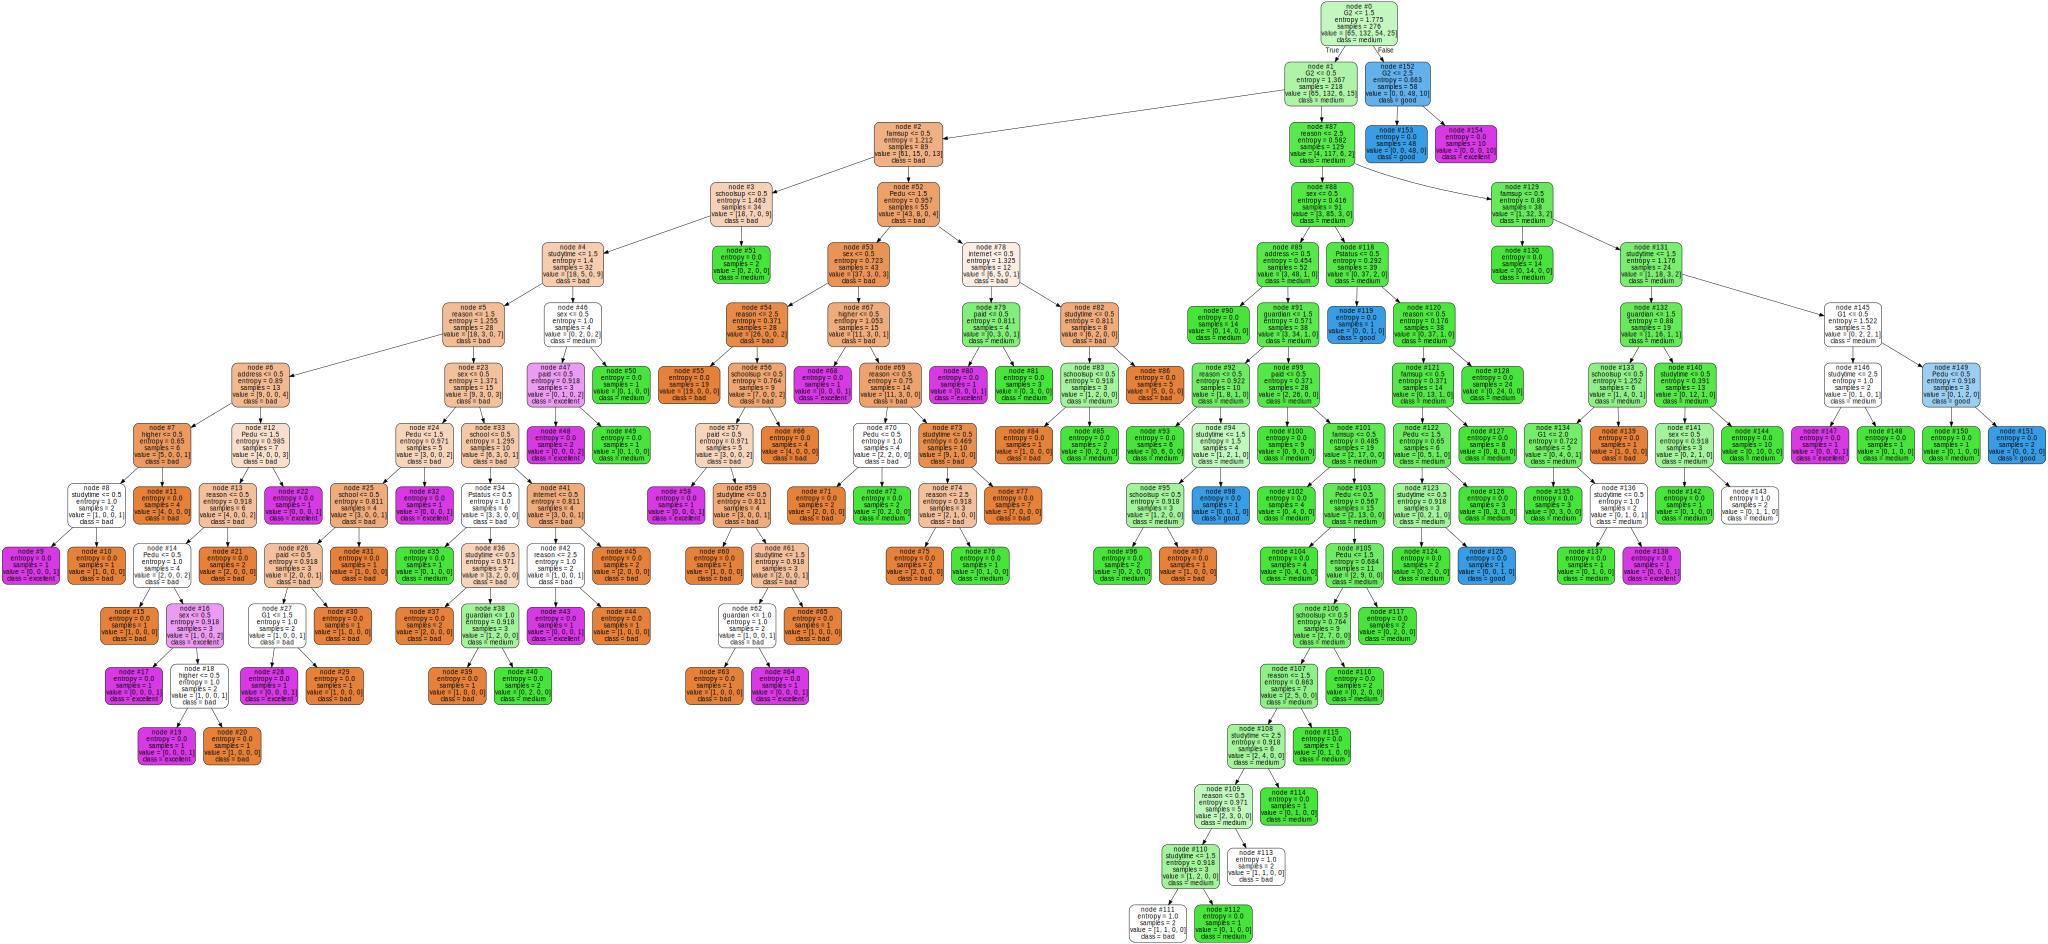

In [27]:
from sklearn.tree import export_graphviz
import graphviz

img = export_graphviz(
    dt_model, out_file=None,
    feature_names=stu_data.columns[:-1].values.tolist(),  # 传入特征名称
    class_names=np.array(["bad", "medium", "good", "excellent"]),  # 传入类别值
    filled=True, node_ids=True,
    rounded=True)

graphviz.Source(img)  # 展示决策树

In [28]:
y_predict = dt_model.predict(x_test) # 使用模型对测试集进行预测
y_predict

array([2, 3, 1, 0, 0, 1, 3, 1, 1, 1, 1, 3, 2, 2, 1, 2, 2, 0, 2, 1, 1, 0,
       2, 2, 1, 0, 2, 2, 1, 2, 0, 3, 0, 1, 3, 0, 3, 3, 2, 0, 2, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 3, 1, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 0, 3, 3, 2, 1, 0, 0, 2, 0, 2, 0, 2, 1, 3, 2, 3, 3, 0,
       0, 1, 3, 1, 1, 1, 1, 2, 0, 0, 2, 0, 0, 1, 2, 1, 3, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 3, 1, 2, 1], dtype=int64)

In [29]:
"""准确率计算
"""

def get_accuracy(test_labels, pred_lables):
    """
    参数:
    test_labels -- 测试集的真实值
    pred_labels -- 测试集的预测值

    返回:
    accur -- 准确率
    """
    correct = np.sum(test_labels == pred_lables)  # 计算预测正确的数据个数
    n = len(test_labels)  # 总测试集数据个数
    accur = correct/n
    return accur


get_accuracy(y_test, y_predict)

0.7058823529411765